In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')

Splitting date/month/yeaar

In [22]:
train['Date'] = train['Date_of_Journey'].str.split('/').str[0]
train['Month'] = train['Date_of_Journey'].str.split('/').str[1]
train['Year'] = train['Date_of_Journey'].str.split('/').str[2]

train['Date'] = train['Date'].astype(int)
train['Month'] = train['Month'].astype(int)
train['Year'] = train['Year'].astype(int)

train = train.drop(columns=['Date_of_Journey'],axis=1)

test['Date'] = test['Date_of_Journey'].str.split('/').str[0]
test['Month'] = test['Date_of_Journey'].str.split('/').str[0]
test['Year'] = test['Date_of_Journey'].str.split('/').str[0]

test['Date'] = test['Date'].astype(int)
test['Month'] = test['Date'].astype(int)
test['Year'] = test['Date'].astype(int)


test = test.drop(columns=['Date_of_Journey'],axis=1)

In [23]:
train = train.drop(columns=['Year'],axis=1)
test = test.drop(columns=['Year'],axis=1)

Splitting departure hour and minute

In [24]:
train['Dep_Hour'] = train['Dep_Time'].str.split(':').str[0]
train['Dep_Minute'] = train['Dep_Time'].str.split(':').str[1]


test['Dep_Hour'] = train['Dep_Time'].str.split(':').str[0]
test['Dep_Minute'] = train['Dep_Time'].str.split(':').str[1]

train['Dep_Hour'] = train['Dep_Hour'].astype(int)
train['Dep_Minute'] = train['Dep_Minute'].astype(int)

test['Dep_Hour'] = test['Dep_Hour'].astype(int)
test['Dep_Minute'] = test['Dep_Minute'].astype(int)

train = train.drop(columns=['Dep_Time'],axis=1)
test = test.drop(columns=['Dep_Time'],axis=1)

Splitting arrival hour and minute

In [25]:
train['Arrival_Time'] = train['Arrival_Time'].str.split(' ').str[0]
test['Arrival_Time'] = test['Arrival_Time'].str.split(' ').str[0]

train['Arrival_Hour'] = train['Arrival_Time'].str.split(':').str[0]
train['Arrival_Minute'] = train['Arrival_Time'].str.split(':').str[1]


test['Arrival_Hour'] = train['Arrival_Time'].str.split(':').str[0]
test['Arrival_Minute'] = train['Arrival_Time'].str.split(':').str[1]

train['Arrival_Hour'] = train['Arrival_Hour'].astype(int)
train['Arrival_Minute'] = train['Arrival_Minute'].astype(int)

test['Arrival_Hour'] = test['Arrival_Hour'].astype(int)
test['Arrival_Minute'] = test['Arrival_Minute'].astype(int)

train = train.drop(columns=['Arrival_Time'],axis=1)
test = test.drop(columns=['Arrival_Time'],axis=1)

In [8]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


Splitting duration

In [26]:
train['Duration'] = train['Duration'].replace('5m','5h')

train['Duration_Hr']=train['Duration'].str.split('h').str[0]

test['Duration'] = test['Duration'].replace('5m','5h')
test['Duration_Hr']=test['Duration'].str.split('h').str[0]

test['Duration_Hr'] = test['Duration_Hr'].astype(int)
train['Duration_Hr'] = train['Duration_Hr'].astype(int)

test = test.drop(columns=['Duration'],axis=1)
train = train.drop(columns=['Duration'],axis=1)

CAtegorical datas -> One hot Encoding

In [27]:
Airline = train[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
Source = train[['Source']]

Source = pd.get_dummies(Source,drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [29]:
Destination = train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Label Encoding by replacing categorical data 

In [30]:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [ ]:
train.dropna(inplace=True)
train.isnull().sum()

In [ ]:
train['Total_Stops'] = train['Total_Stops'].astype(int)
train.head(2)

In [33]:
train = train.drop(columns=['Route','Additional_Info','Airline','Source','Destination'],axis=1)

In [34]:
df_train=pd.concat([train,Airline,Source,Destination],axis=1)

In [35]:
df_train.head()

,Total_Stops,Price,Date,Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hr,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
df_train.shape

(10683, 29)

In [37]:
Airline = test[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Source = test[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Destination = test[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [ ]:
test.head()

In [39]:
test = test.drop(columns=['Route','Additional_Info','Airline','Source','Destination'],axis=1)
df_test=pd.concat([test,Airline,Source,Destination],axis=1)

In [41]:
df_test.head()

,Total_Stops,Date,Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hr,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,22,20,1,10,10,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,12,5,50,13,15,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,21,9,25,4,25,23,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,21,18,5,23,30,13,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,24,16,50,21,35,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [50]:
df_train.dropna(inplace=True)

In [51]:
df_train.isnull().sum()

Total_Stops                                  0
Price                                        0
Date                                         0
Month                                        0
Dep_Hour                                     0
Dep_Minute                                   0
Arrival_Hour                                 0
Arrival_Minute                               0
Duration_Hr                                  0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi 

In [52]:
X = df_train.drop(columns=['Price'],axis=1)
y = df_train['Price']

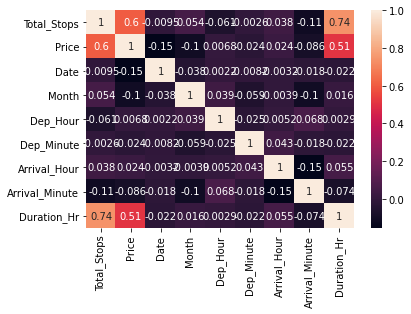

In [43]:
sns.heatmap(train.corr(),annot=True)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

RandomForestRegressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [56]:
y_pred = reg_rf.predict(X_test)

In [57]:
reg_rf.score(X_train, y_train)

0.9546629386980858

In [58]:
reg_rf.score(X_test, y_test)

0.7982023544343204

In [62]:
y_test

6075     16655.0
3544      4959.0
9291      9187.0
5032      3858.0
2483     12898.0
          ...   
9797      7408.0
9871      4622.0
10063     7452.0
8802      8824.0
8617     14151.0
Name: Price, Length: 2137, dtype: float64

In [63]:
y_pred

array([16828.8       ,  5527.75      ,  8936.46      , ...,
        6480.25      , 12658.56833333, 12959.75633333])

LinearRegression

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [71]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.7982023544343204
